# Machine Learning Engineer Nanodegree
## Capstone Project
Ian Gregson
September 22nd 2018

# 1. Definition

### Project Overview

### Problem Statement

### Metrics

In [1]:
from sklearn.metrics import f1_score, make_scorer
f1_scorer = make_scorer(f1_score)

## 2. Analysis

### Data Exploration

In [2]:
import pandas as pd
raw_data = pd.read_csv('data/csv/raw_data.csv', low_memory=False)

In [3]:
display(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33338 entries, 0 to 33337
Data columns (total 58 columns):
Account_Region__c                             25312 non-null object
Account_Theater__c                            10070 non-null object
ACV__c                                        33338 non-null float64
C_Contact_has_accepted_a_follow_on_step__c    33338 non-null bool
Consulting_Services_Amount__c                 33338 non-null float64
Created_by_Role__c                            33338 non-null object
Deal_Type__c                                  781 non-null object
Decision_Process__c                           0 non-null float64
Delivery_Type__c                              2 non-null object
Deployment_timeframe__c                       11 non-null object
Difference_between_Created_and_Modified__c    33338 non-null float64
DM_Close_Type__c                              33338 non-null object
DM_Opp_Age__c                                 33338 non-null float64
DM_Playbook_Stage

None

In [4]:
raw_data.describe()

,ACV__c,Consulting_Services_Amount__c,Decision_Process__c,Difference_between_Created_and_Modified__c,DM_Opp_Age__c,Inbound_Source__c,Metric_Accept2Close__c,Metric_Create2Close__c,New_and_Add_On_Subscription__c,New_Business_Subscription__c,Number_of_Products__c,Opportunity_Contact_Roles__c,Services_Amount__c,Subscr_Fields_Not_Populated__c,Subscription_Amount__c,Total_List_Price__c,Amount
count,3.333800e+04,3.333800e+04,0.0,33338.000000,33338.000000,0.0,33338.000000,33338.000000,2.788600e+04,1.418400e+04,33338.000000,26576.000000,3.333800e+04,33338.000000,3.333800e+04,3.333800e+04,3.184500e+04
mean,5.035573e+04,1.008869e+04,NaN,571.161445,142.491541,NaN,94.941088,106.490011,6.022574e+04,9.608817e+04,2.342702,1.280441,1.109436e+04,1.791409,7.347621e+04,7.296944e+05,8.884807e+04
std,1.090373e+05,5.107865e+04,NaN,202.282226,190.777608,NaN,163.021917,151.084283,1.166767e+05,9.849323e+04,2.356247,3.240843,5.226663e+04,2.382024,1.805952e+05,5.646617e+07,1.986473e+05
min,-3.250000e+05,-2.040300e+05,NaN,53.809074,-1183.000000,NaN,0.000000,0.000000,-3.250000e+05,-1.791476e+05,0.000000,0.000000,-2.040300e+05,0.000000,-3.250000e+05,-1.190000e+04,-3.250000e+05
25%,0.000000e+00,0.000000e+00,NaN,410.198252,0.000000,NaN,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.990000e+02,2.990000e+02
50%,0.000000e+00,0.000000e+00,NaN,545.991250,70.000000,NaN,6.000000,23.000000,9.150000e+00,7.887700e+04,1.000000,1.000000,0.000000e+00,1.000000,1.812678e+04,7.220000e+04,4.270350e+04
75%,7.887700e+04,0.000000e+00,NaN,744.147477,253.000000,NaN,135.000000,174.000000,8.051989e+04,1.536770e+05,3.000000,1.000000,0.000000e+00,3.000000,1.000000e+05,1.514570e+05,1.206370e+05
max,6.601738e+06,3.118588e+06,NaN,1006.800787,1829.000000,NaN,1855.000000,1829.000000,6.601738e+06,2.000000e+06,30.000000,148.000000,3.214212e+06,28.000000,1.155000e+07,5.595040e+09,1.155000e+07


In [5]:
raw_data.head()

,Account_Region__c,Account_Theater__c,ACV__c,C_Contact_has_accepted_a_follow_on_step__c,Consulting_Services_Amount__c,Created_by_Role__c,Deal_Type__c,Decision_Process__c,Delivery_Type__c,Deployment_timeframe__c,...,Services_Amount__c,Services_Attached__c,Stage__c,Subscr_Fields_Not_Populated__c,Subscription_Amount__c,Total_List_Price__c,Who_is_leading_the_sale__c,Amount,StageName,Type
0,North,NaN,78877.0,True,0.0,NA-ADR-North-RSM,NaN,NaN,NaN,NaN,...,0.0,False,Closed Lost,1.0,78877.0,83057.0,NaN,78877.0,Closed Lost,New Business
1,North,NaN,114498.0,False,0.0,NA-Channel-GSI Director,NaN,NaN,NaN,NaN,...,0.0,False,0. Sales Qualified Lead,2.0,114498.0,114498.0,Partner,114498.0,0. Sales Qualified Lead,New Business
2,North,NaN,0.0,False,0.0,NA-ADR-North-RSM,NaN,NaN,NaN,NaN,...,0.0,False,Closed Lost,0.0,0.0,0.0,NaN,0.0,Closed Lost,New Business
3,North,NaN,78877.0,True,0.0,EMEA-ADR-UK-RMT,NaN,NaN,NaN,NaN,...,0.0,False,Closed Lost,1.0,78877.0,83057.0,NaN,78877.0,Closed Lost,New Business
4,UK,EMEA,113400.0,True,50000.0,EMEA-Sales-UK-PS-Strategic,NaN,NaN,NaN,NaN,...,50000.0,True,Closed Lost,1.0,113400.0,193400.0,MuleSoft,163400.0,Closed Lost,New Business


### Exploratory Visualization

**Data types**

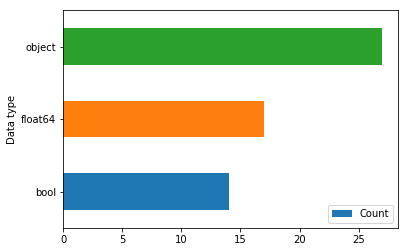

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data_types = raw_data.columns.to_series().groupby(raw_data.dtypes).groups
data_types_list = []

for t in data_types:
    data_types_list.append([str(t), len(data_types[t])])

data_types = pd.DataFrame(data_types_list, columns=['Data type','Count'])
data_types.plot(x='Data type', y='Count', kind='barh')

**Null values**

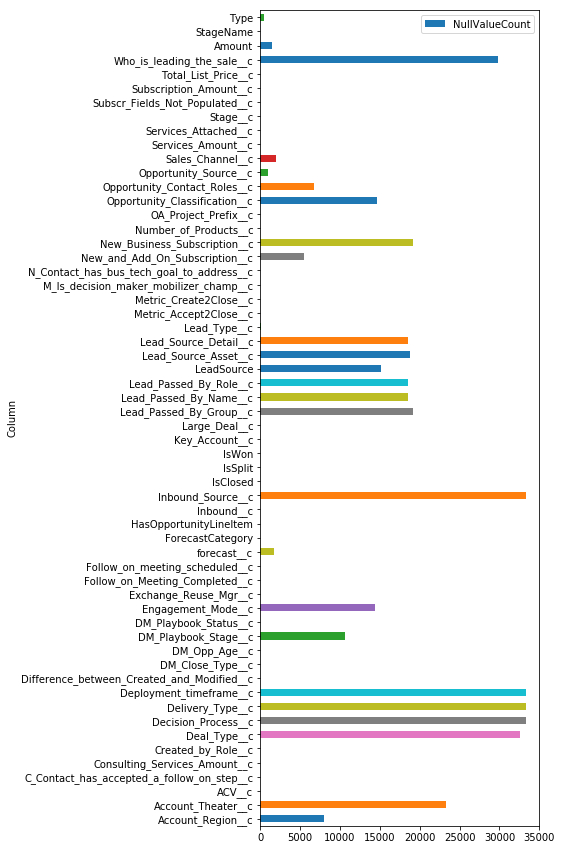

In [7]:
null_value_counts = []
for col in raw_data:
    null_value_counts.append((col, raw_data[col].isnull().sum()))
pd.DataFrame(null_value_counts, columns=['Column', 'NullValueCount']).plot(x='Column', y='NullValueCount', kind='barh', figsize=(5,15))

**Categorical features with high dimensionality**

,Column,UniqueValueCount
0,Account_Region__c,22
1,Created_by_Role__c,183
2,Lead_Passed_By_Name__c,352
3,Lead_Passed_By_Role__c,211
4,LeadSource,48
5,Lead_Source_Asset__c,819
6,Lead_Source_Detail__c,207


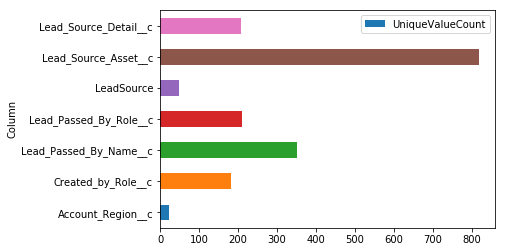

In [8]:
high_dimension_categorical_features = []
for index, dtype in enumerate(raw_data.dtypes):
    col = raw_data.columns[index]
    if dtype == 'object':
        unique_value_count = len(raw_data[col].unique())
        # The magic number here is 18 since that is the number of stages         
        if unique_value_count > 18:
            high_dimension_categorical_features.append((col, unique_value_count))

high_dimension_categorical_features = pd.DataFrame(high_dimension_categorical_features, columns=['Column', 'UniqueValueCount'])
display(high_dimension_categorical_features)
high_dimension_categorical_features.plot.barh(x='Column',y='UniqueValueCount')

This tells that we need to reduce the dimensionality of these features using some kind of unsupervised clustering step like `sklearn.cluster.FeatureAgglomeration`

**Labels**

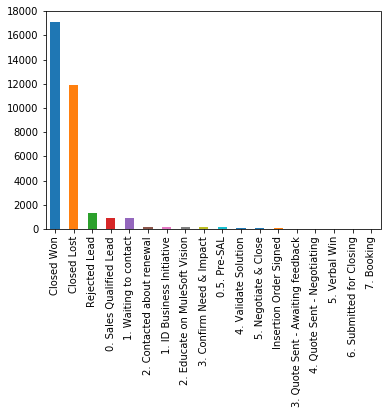

In [9]:
pd.value_counts(raw_data['StageName']).plot.bar()

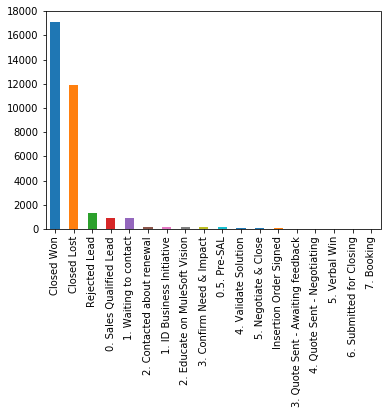

In [10]:
pd.value_counts(raw_data['Stage__c']).plot.bar()

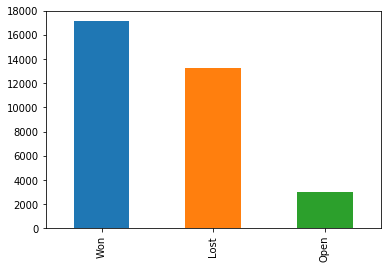

In [11]:
pd.value_counts(raw_data['DM_Close_Type__c']).plot.bar()

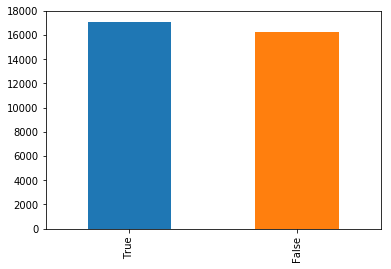

In [12]:
pd.value_counts(raw_data['IsWon']).plot.bar()

This tells that there are multiple features that could be used as our labels but only one is required. Care should be taken to use one properly and remove the others.

E.g. remove samples with `DM_Close_Type__c='Open'`, use the `IsWon` feature as our labels, drop columns closely correlated with this.

**Correlations**

In [13]:
print(high_dimension_categorical_features['Column'])

0         Account_Region__c
1        Created_by_Role__c
2    Lead_Passed_By_Name__c
3    Lead_Passed_By_Role__c
4                LeadSource
5      Lead_Source_Asset__c
6     Lead_Source_Detail__c
Name: Column, dtype: object


In [14]:
import utils

# drop high dimensional features so we don't blow up the dataset
corr_data = raw_data.drop(high_dimension_categorical_features['Column'].values, axis='columns')
# drop columns with 90% null values
row_count, col_count = corr_data.shape
na_threshold = int(round(row_count * 0.9))
corr_data = corr_data.dropna(thresh=na_threshold, axis='columns')
display(corr_data.shape)
# backfill the remaining null values
corr_data = corr_data.fillna(method='backfill', axis='columns')
# one hot encoding
encoded_corr_data = utils.encode(corr_data)
display(encoded_corr_data.shape)

(33338, 37)

(33338, 141)

In [15]:
# only run correlation analysis on a sample of the dataset to save time
row_count = encoded_corr_data.shape[0]
encoded_corr_data = encoded_corr_data.sample(int(row_count * 0.1)).dropna(axis='columns')

In [16]:
display(encoded_corr_data.shape)
corr = encoded_corr_data.corr().abs()

(3333, 140)

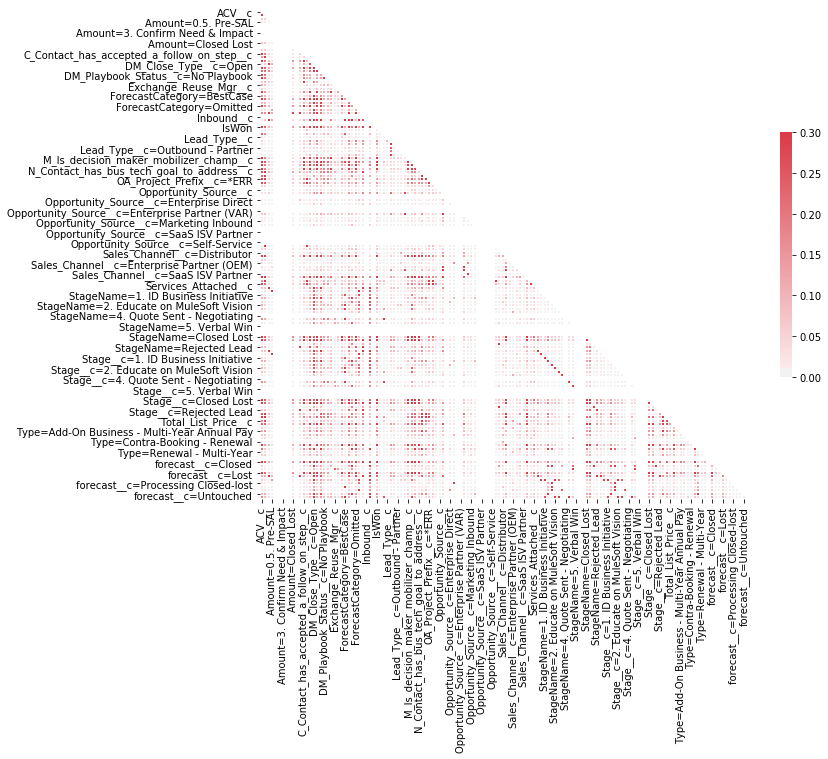

In [17]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

This shows there are indeed highly correlated features, but it's hard to tell from this chart which is which. A cursory look hints that the high correlations look predominantly like proxies for our labels. Let's zoom in on that...

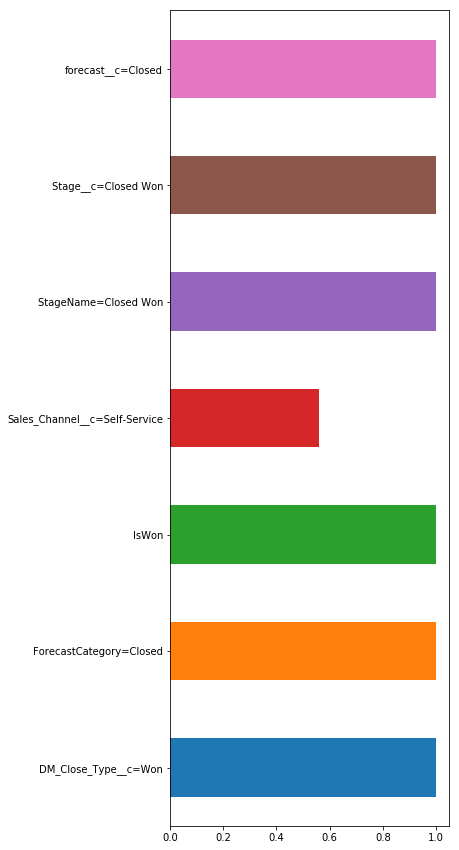

In [18]:
is_won = encoded_corr_data['IsWon']
corr_with = encoded_corr_data.corrwith(is_won, axis=0)
corr_with.abs()[corr_with > 0.5].plot(kind='barh', figsize=(5,15))

This shows the columns most highly correlated with our label column - these features should be removed.

### Algorithms and Techniques

**Constants**

In [19]:
# Set up some necessary constants
SPLIT_RANDOM_SEED = 42
SEARCH_RANDOM_SEED = 56
DCLF_RANDOM_SEED = 42
K_FOLD_RANDOM_SEED = 3
K_FOLDS = 50
K_FEATURES = 50
NA_THRESHOLD = 0.975
LABEL_COLUMN = 'IsWon'
TEST_SIZE = 0.2

**Classifiers**

In [20]:
# Set up the dummy classifier for Benchmarking
from sklearn.dummy import DummyClassifier

# Real classifiers for model selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
import utils


/usr/local/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


**Processing utilities**

In [21]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.cluster import FeatureAgglomeration

# Plus, we want the sklearn model selection tools for cross validation,
# grid search and splitting traingin and testing data.
from sklearn import model_selection

All classifiers will go through model selection using default parameters. This should be enough to endicate which is the more performant model. The most performant model will then have it's parameters tuned using `model_selection.GridSearchCV`.

### Benchmark

In [22]:
# Filter down the raw data to only include samples from opportunities that
# are won or lost
print('Raw data shape: ', raw_data.shape)
display(raw_data['DM_Close_Type__c'].unique())
benchmark_data = raw_data[raw_data['DM_Close_Type__c'].isin(['Lost','Won'])]
print('Benchmark data shape: ', benchmark_data.shape)
display(benchmark_data['DM_Close_Type__c'].unique())
display(benchmark_data['StageName'].unique())

Raw data shape:  (33338, 58)


array(['Lost', 'Open', 'Won'], dtype=object)

Benchmark data shape:  (30339, 58)


array(['Lost', 'Won'], dtype=object)

array(['Closed Lost', 'Rejected Lead', 'Closed Won'], dtype=object)

In [23]:
# Pull our labels out from the benchmark data and encode them
labels = np.asarray(benchmark_data[LABEL_COLUMN])
labels = LabelEncoder().fit_transform(labels)
benchmark_data = benchmark_data.drop([LABEL_COLUMN], axis='columns')
print('Benchmark data shape: ', benchmark_data.shape)

Benchmark data shape:  (30339, 57)


In [24]:
# First pass at dropping na columns
row_count, col_count = benchmark_data.shape
na_thresh = int(round(row_count * NA_THRESHOLD))
benchmark_data = benchmark_data.dropna(thresh=na_thresh, axis='columns')
print('Benchmark data shape: ', benchmark_data.shape)

Benchmark data shape:  (30339, 34)


In [25]:
# Backfill the remaining columns
benchmark_data = benchmark_data.fillna(method='backfill', axis='columns')

In [26]:
# Deal with high dimensional features:
# - remove them from benchmark_data to new DataFrame
# - one hot encode both DataFrames
# - perform feature agglomeration on the high dimensional features
# - join the Dataframes together again
high_dimension_categorical_feature_names = []
for index, dtype in enumerate(benchmark_data.dtypes):
    col = benchmark_data.columns[index]
    if dtype == 'object':
        unique_value_count = len(benchmark_data[col].unique())
        # The magic number here is 18 since that is the number of stages         
        if unique_value_count > 18:
            high_dimension_categorical_feature_names.append(col)
high_dimension_categorical_features = benchmark_data[high_dimension_categorical_feature_names]
benchmark_data = benchmark_data.drop(high_dimension_categorical_feature_names, axis='columns')
print('High dimensional data shape: ', high_dimension_categorical_features.shape)
print('Benchmark data shape: ', benchmark_data.shape)

High dimensional data shape:  (30339, 14)
Benchmark data shape:  (30339, 20)


In [27]:
# Encode and agglomerate high dimensional features
high_dimension_categorical_features = utils.encode(high_dimension_categorical_features)
print('High dimensional data shape: ', high_dimension_categorical_features.shape)
high_dimension_categorical_features = FeatureAgglomeration(n_clusters=32).fit_transform(high_dimension_categorical_features)
print('High dimensional data shape: ', high_dimension_categorical_features.shape)

# Encode the rest of the data
benchmark_data = utils.encode(benchmark_data)
print('Benchmark data shape: ', benchmark_data.shape)

High dimensional data shape:  (30339, 202)
High dimensional data shape:  (30339, 32)
Benchmark data shape:  (30339, 40)


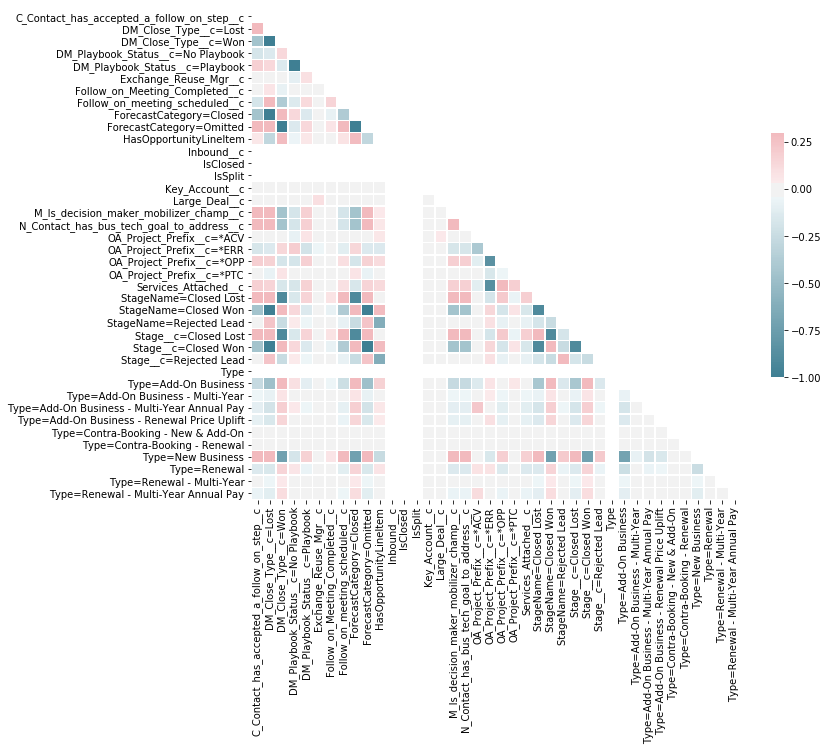

In [28]:
# Deal with correlated features
labels_df = pd.DataFrame(labels, columns=['label'], dtype='float64')
benchmark_corr = benchmark_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(benchmark_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(benchmark_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

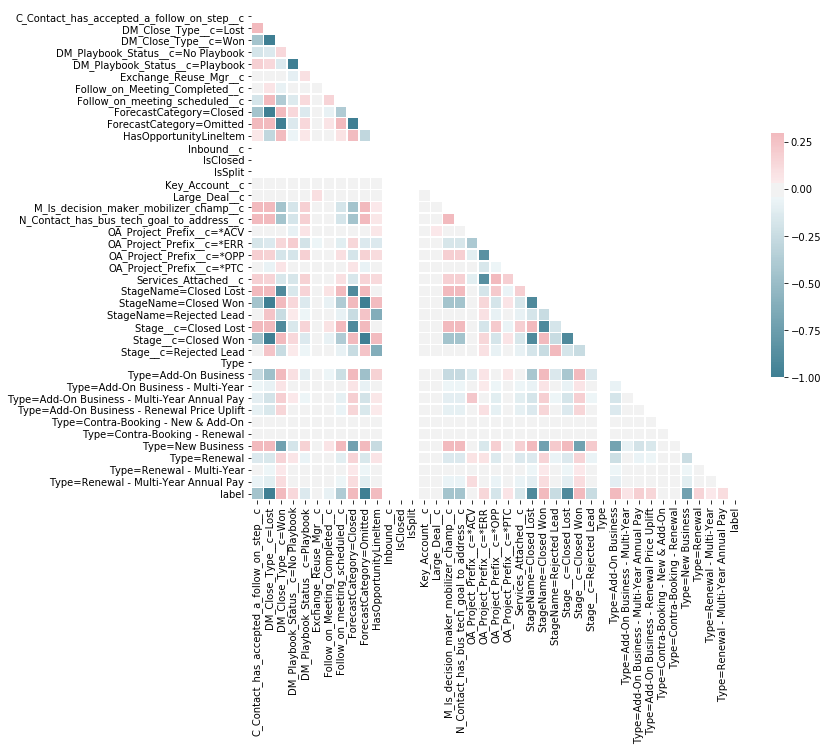

In [29]:
corr_df = benchmark_data
corr_df['label'] = labels

corr = corr_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

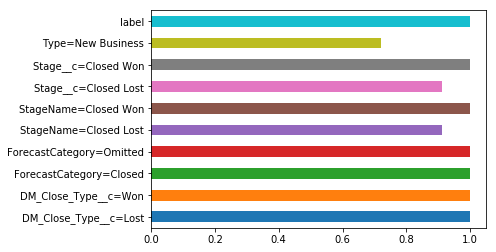

In [30]:
corr['label'].abs()[corr['label'].abs() > 0.5].plot(kind='barh')

In [31]:
# drop the correlated columns from the benchmark data
cols_to_drop = list(corr['label'].abs()[corr['label'].abs() > 0.5].drop(labels=['label']).keys())
benchmark_data = benchmark_data.drop(columns=cols_to_drop)
print('Benchmark data shape: ', benchmark_data.shape)

Benchmark data shape:  (30339, 32)


In [32]:
benchmark_data = benchmark_data.dropna(axis='columns')

In [33]:
# join high dimensional data and rest of benchmark data
benchmark_array = np.hstack((np.asarray(benchmark_data), high_dimension_categorical_features))

print('High dimensional data shape: ', high_dimension_categorical_features.shape)
print('Benchmark data shape: ', benchmark_data.shape)
print('Benchmark array shape: ', benchmark_array.shape)

High dimensional data shape:  (30339, 32)
Benchmark data shape:  (30339, 31)
Benchmark array shape:  (30339, 63)


In [34]:
# train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(benchmark_array, labels, test_size=TEST_SIZE, random_state=SPLIT_RANDOM_SEED)

In [35]:
dclf = DummyClassifier(random_state=DCLF_RANDOM_SEED)

In [36]:
# CV the dummy classifier and report the mean f1_score
kfold = model_selection.KFold(n_splits=K_FOLDS, random_state=K_FOLD_RANDOM_SEED)
cv_results = model_selection.cross_val_score(dclf, X_train, y_train, cv=kfold, scoring=f1_scorer)
display('Mean f1_score from KFold cross validation {:0.2f}'.format(cv_results.mean()))

'Mean f1_score from KFold cross validation 0.56'

## 3. Methodolgy

### Data Preprocessing

In [37]:
# Load the dataset
raw = pd.read_csv('data/csv/raw_data.csv', low_memory=False)
print('Raw data shape: ', raw.shape)

Raw data shape:  (33338, 58)


In [38]:
# Filter down the raw data to only include samples from opportunities that
# are won or lost
df = raw[raw['DM_Close_Type__c'].isin(['Lost','Won'])]
print('df shape: ', df.shape)

df shape:  (30339, 58)


In [39]:
# Pull our labels out from the benchmark data and encode them
labels = np.asarray(df[LABEL_COLUMN])
labels = LabelEncoder().fit_transform(labels)
df = df.drop([LABEL_COLUMN], axis='columns')
print('df shape: ', df.shape)
print('labels shape: ', labels.shape)

df shape:  (30339, 57)
labels shape:  (30339,)


In [40]:
# First pass at dropping na columns
row_count, col_count = df.shape
na_thresh = int(round(row_count * NA_THRESHOLD))
df = df.dropna(thresh=na_thresh, axis='columns')
print('df shape: ', df.shape)

df shape:  (30339, 34)


In [41]:
# Backfill the remaining columns
df = df.fillna(method='backfill', axis='columns')

In [42]:
# Pick out high dimensional features 
hd_feature_names = []
for index, dtype in enumerate(df.dtypes):
    col = df.columns[index]
    if dtype == 'object':
        unique_value_count = len(df[col].unique())
        # The magic number here is 18 since that is the number of stages         
        if unique_value_count > 18:
            hd_feature_names.append(col)
hd_features = df[hd_feature_names]
df = df.drop(hd_feature_names, axis='columns')
print('High dimensional data shape: ', hd_features.shape)
print('df shape: ', df.shape)

High dimensional data shape:  (30339, 14)
df shape:  (30339, 20)


In [43]:
# Encode and agglomerate high dimensional features
hd_features = utils.encode(hd_features)
hd_features = FeatureAgglomeration(n_clusters=32).fit_transform(hd_features)

# Encode the rest of the data
df = utils.encode(df)

print('High dimensional data shape: ', hd_features.shape)                           
print('df shape: ', df.shape)

High dimensional data shape:  (30339, 32)
df shape:  (30339, 40)


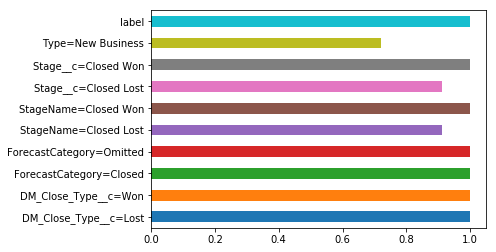

In [44]:
# Remove highly correlated features with label
corr_df = df.copy(deep=True)
corr_df['label'] = labels

corr = corr_df.corr()
corr['label'].abs()[corr['label'].abs() > 0.5].plot(kind='barh')

In [45]:
cols_to_drop = list(corr['label'].abs()[corr['label'].abs() > 0.5].drop(labels=['label']).keys())
df = df.drop(columns=cols_to_drop)
print('df shape: ', df.shape)

df shape:  (30339, 31)


In [46]:
# Final drop of null columns
df = df.dropna(axis='columns')

In [47]:
# Prep features array
features = np.hstack((np.asarray(df), hd_features))

print('High dimensional data shape: ', hd_features.shape)
print('df shape: ', df.shape)
print('Features array shape: ', features.shape)
print('Labels array shape: ', labels.shape)

High dimensional data shape:  (30339, 32)
df shape:  (30339, 30)
Features array shape:  (30339, 62)
Labels array shape:  (30339,)


In [48]:
# train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, labels, test_size=TEST_SIZE, random_state=SPLIT_RANDOM_SEED)

### Implementation

In [49]:
# Set up our data structure of models
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('LGBM', lgb.sklearn.LGBMClassifier(objective='binary')))
models.append(('XGB', xgb.XGBClassifier(objective='binary:logistic')))

LR: 0.819570 (0.098033)
NB: 0.720277 (0.001949)
RF: 0.953948 (0.009466)
LGBM: 0.962710 (0.009271)
XGB: 0.958668 (0.010180)


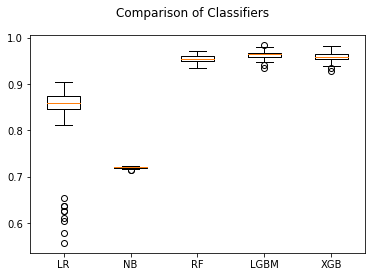

In [50]:
# Model Evaluation via cross validation
results = []
names = []

X = features.copy()
y = labels.copy()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=TEST_SIZE, random_state=SPLIT_RANDOM_SEED)

for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=K_FOLD_RANDOM_SEED)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=f1_scorer)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot to compare algorithms
fig = plt.figure()
fig.suptitle('Comparison of Classifiers')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Refinement

In [51]:
X = features.copy()
y = labels.copy()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=TEST_SIZE, random_state=SPLIT_RANDOM_SEED)

# Feature scaling
X_train = MaxAbsScaler().fit_transform(X_train)
X_test = MaxAbsScaler().fit_transform(X_test)

In [52]:
# Feature selection
X_train = SelectKBest(score_func=mutual_info_classif, k=K_FEATURES).fit_transform(X_train, y_train)
X_test = SelectKBest(score_func=mutual_info_classif, k=K_FEATURES).fit_transform(X_test, y_test)

In [53]:
# Set up our data structure of models
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('LGBM', lgb.sklearn.LGBMClassifier(objective='binary')))
models.append(('XGB', xgb.XGBClassifier(objective='binary:logistic')))

LR: 0.932597 (0.010996)
NB: 0.913532 (0.010869)
RF: 0.953128 (0.010055)
LGBM: 0.961663 (0.008298)
XGB: 0.958623 (0.009214)


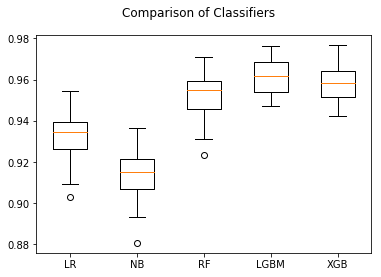

In [54]:
# Model Evaluation via cross validation
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=K_FOLDS, shuffle=True, random_state=K_FOLD_RANDOM_SEED)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=f1_scorer)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot to compare algorithms
fig = plt.figure()
fig.suptitle('Comparison of Classifiers')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [59]:
grid_params = {
    'LR': {
        'C': np.logspace(-3,3,7),
        'penalty': ['l1', 'l2']
    },
    'LGBM': {
        'learning_rate': [0.1, 0.01, 0.005],
        'num_leaves': [6,8,12,16],
        'n_estimators': [50,100,200],
        'objective' : ['binary'],
        'random_state': [42]
    }
}

# Set up our data structure of models
models = []
tuned_models = []
models.append(('LR', LogisticRegression()))
models.append(('LGBM', lgb.sklearn.LGBMClassifier(objective='binary')))

scores = []

X = features.copy()
y = labels.copy()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=TEST_SIZE, random_state=SPLIT_RANDOM_SEED)

for name, model in models:
    n_jobs = 4
    if name == 'LR':
        n_jobs = 1
    clf = model_selection.GridSearchCV(model, grid_params[name], verbose=0, cv=kfold, n_jobs=1, scoring=f1_scorer)
    clf = clf.fit(X_train, y_train)
    score = clf.best_score_
    scores.append((name, score))     
    tuned_models.append((name, clf))
       
for name, score in scores:
    print(name, score)

LR 0.9398121405967179
LGBM 0.9620499299349633


## 4. Results

### Model Evaluation and Validation

In [61]:
final_scores = []

for name, clf in tuned_models:
    y_pred = clf.predict(X_test)
    score = f1_score(y_test, y_pred)
    final_scores.append((name, score))

for name, score in final_scores:
    print(name, score)

LR 0.9405911618378695
LGBM 0.9662657670871223


### Jusitifcation

## 5. Conclusion

### Free-Form Visualization

### Reflection

### Improvement